In [1]:
import os
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Input

In [2]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'train dataset\\',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(224, 224),
  batch_size=32)


Found 3840 files belonging to 5 classes.
Using 3072 files for training.


In [3]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  'train dataset\\',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(224, 224),
  batch_size=32)


Found 3840 files belonging to 5 classes.
Using 768 files for validation.


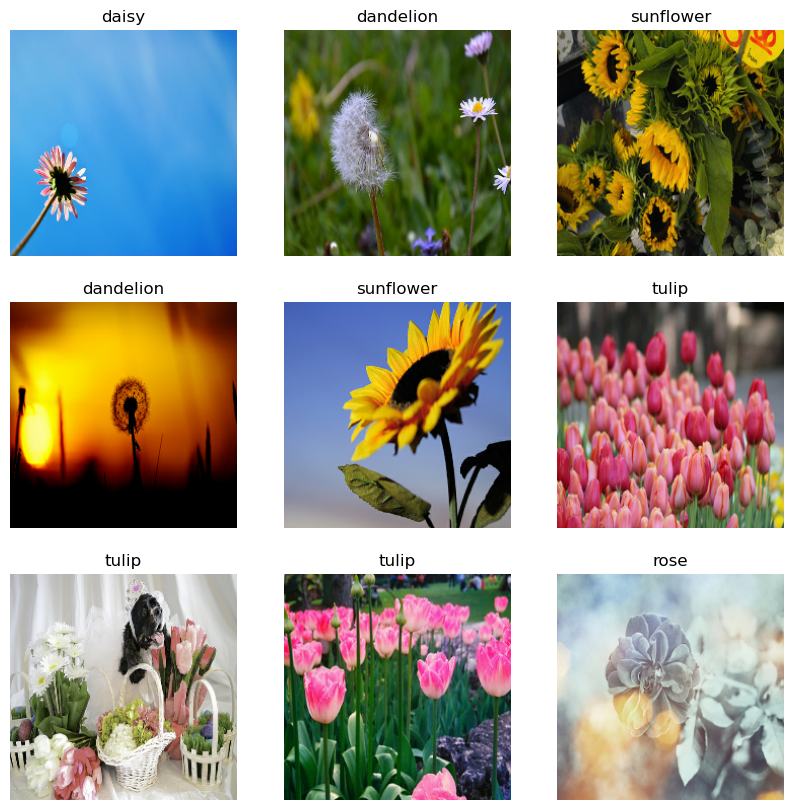

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")
    

In [5]:
clases=train_ds.class_names

In [6]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
from tensorflow.keras.applications.efficientnet import EfficientNetB6


In [8]:
base1=EfficientNetB6(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
)


In [9]:
base1.trainable=False

In [15]:
in2=Input(shape=(224,224,3))
x1=layers.RandomFlip("horizontal")(in2)
x1=layers.RandomRotation(0.1)(x1)
x1=layers.RandomZoom(0.1)(x1)
x1=preprocess_input(x1)
x1=base1(x1,training=False)
x1=tf.keras.layers.GlobalAveragePooling2D()(x1)
x1=tf.keras.layers.Dense(500,activation='relu')(x1)
x1=tf.keras.layers.Dropout(0.2)(x1)
x1=tf.keras.layers.Dense(150,activation='relu',kernel_regularizer='l1')(x1)
x1=tf.keras.layers.Dense(50,activation='relu',kernel_regularizer='l1')(x1)
out1=tf.keras.layers.Dense(5,activation=tf.keras.activations.softmax)(x1)
model3=Model(in2,out1)

In [16]:
model3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 224, 224, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 224, 224, 3)       0         
                                                                 
 efficientnetb6 (Functional)  (None, 7, 7, 2304)       40960143  
                                                                 
 global_average_pooling2d_1   (None, 2304)             0         
 (GlobalAveragePooling2D)                                  

In [17]:
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
pathin=tf.keras.callbacks.EarlyStopping(patience=5)

In [18]:
history3 = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=30,batch_size=4096,callbacks=[pathin],
  class_weight={0: 1.42, 1: 1., 2: 1.38, 3:1.49, 4:1.07}
)

Epoch 1/30
96/96 [==============================] - 172s 2s/step - loss: 40.1096 - accuracy: 0.6523 - val_loss: 35.9043 - val_accuracy: 0.8164
Epoch 2/30
96/96 [==============================] - 141s 1s/step - loss: 32.7983 - accuracy: 0.8265 - val_loss: 29.4365 - val_accuracy: 0.8542
Epoch 3/30
96/96 [==============================] - 146s 2s/step - loss: 26.7132 - accuracy: 0.8555 - val_loss: 23.8135 - val_accuracy: 0.8542
Epoch 4/30
96/96 [==============================] - 156s 2s/step - loss: 21.4253 - accuracy: 0.8734 - val_loss: 18.8819 - val_accuracy: 0.8633
Epoch 5/30
96/96 [==============================] - 154s 2s/step - loss: 16.8571 - accuracy: 0.8730 - val_loss: 14.6718 - val_accuracy: 0.8841
Epoch 6/30
96/96 [==============================] - 143s 1s/step - loss: 12.9978 - accuracy: 0.8844 - val_loss: 11.1564 - val_accuracy: 0.8815
Epoch 7/30
96/96 [==============================] - 142s 1s/step - loss: 9.8022 - accuracy: 0.8809 - val_loss: 8.3049 - val_accuracy: 0.8815
E

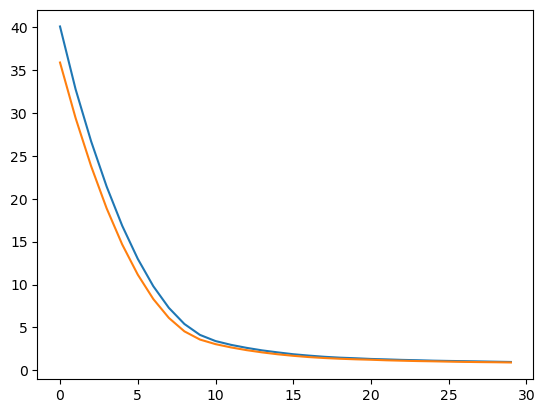

In [19]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

In [20]:
import os

In [21]:
data=os.listdir('test dataset\\')

In [22]:

a={'file_name':[],'type':[]}
for i in data:
    pat=os.path.join('test dataset',i)
    print(pat)
    img = tf.keras.utils.load_img(pat, target_size=(224, 224))
    img_array = tf.keras.utils.img_to_array(img)
    #plt.imshow(img_array.astype("uint8"))
    img_array = tf.expand_dims(img_array, 0)
    predictions = model3.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    a['file_name'].append(i)
    a['type'].append(clases[list(score).index(max(score))])

test dataset\1008566138_6927679c8a.jpg
1/1 [==============================] - 7s 7s/step
test dataset\10200780773_c6051a7d71_n.jpg
1/1 [==============================] - 0s 87ms/step
test dataset\10294487385_92a0676c7d_m.jpg
1/1 [==============================] - 0s 82ms/step
test dataset\10386522775_4f8c616999_m.jpg
1/1 [==============================] - 0s 73ms/step
test dataset\1043442695_4556c4c13d_n.jpg
1/1 [==============================] - 0s 85ms/step
test dataset\10437652486_aa86c14985.jpg
1/1 [==============================] - 0s 79ms/step
test dataset\10617191174_9a01753241_n.jpg
1/1 [==============================] - 0s 81ms/step
test dataset\10683189_bd6e371b97.jpg
1/1 [==============================] - 0s 77ms/step
test dataset\10791227_7168491604.jpg
1/1 [==============================] - 0s 81ms/step
test dataset\112334842_3ecf7585dd.jpg
1/1 [==============================] - 0s 79ms/step
test dataset\11296320473_1d9261ddcb.jpg
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 80ms/step
test dataset\15275144259_f9a18ec9cb.jpg
1/1 [==============================] - 0s 91ms/step
test dataset\15358221063_2c6e548e84.jpg
1/1 [==============================] - 0s 95ms/step
test dataset\154332674_453cea64f4.jpg
1/1 [==============================] - 0s 86ms/step
test dataset\15472217046_2699b25584.jpg
1/1 [==============================] - 0s 83ms/step
test dataset\15493195788_60530f2398_m.jpg
1/1 [==============================] - 0s 82ms/step
test dataset\155646858_9a8b5e8fc8.jpg
1/1 [==============================] - 0s 91ms/step
test dataset\15760811380_4d686c892b_n.jpg
1/1 [==============================] - 0s 85ms/step
test dataset\15922772266_1167a06620.jpg
1/1 [==============================] - 0s 78ms/step
test dataset\15978010566_5fa5905af1_n.jpg
1/1 [==============================] - 0s 77ms/step
test dataset\15987457_49dc11bf4b.jpg
1/1 [==============================] - 0s 77ms/step
test dataset\16018886851_c327

1/1 [==============================] - 0s 82ms/step
test dataset\2220085701_896054d263_n.jpg
1/1 [==============================] - 0s 78ms/step
test dataset\22405882322_d4561f8469_n.jpg
1/1 [==============================] - 0s 75ms/step
test dataset\22419079265_8902cddb7d_n.jpg
1/1 [==============================] - 0s 92ms/step
test dataset\2243427551_809b603992_z.jpg
1/1 [==============================] - 0s 80ms/step
test dataset\2249756775_02e693beda_n.jpg
1/1 [==============================] - 0s 76ms/step
test dataset\2331651885_619653a5d3.jpg
1/1 [==============================] - 0s 76ms/step
test dataset\2427626706_ffdf697f84_n.jpg
1/1 [==============================] - 0s 78ms/step
test dataset\2443095419_17b920d155_m.jpg
1/1 [==============================] - 0s 79ms/step
test dataset\2443192475_c64c66d9c2.jpg
1/1 [==============================] - 0s 86ms/step
test dataset\2477231067_3aecef1bf8_n.jpg
1/1 [==============================] - 0s 78ms/step
test dataset\2488902

1/1 [==============================] - 0s 77ms/step
test dataset\3625257860_33efeef614_m.jpg
1/1 [==============================] - 0s 83ms/step
test dataset\3661675690_ed2d05fa5f_n.jpg
1/1 [==============================] - 0s 78ms/step
test dataset\3667366832_7a8017c528_n.jpg
1/1 [==============================] - 0s 81ms/step
test dataset\3704305945_a80e60e2f6_m.jpg
1/1 [==============================] - 0s 96ms/step
test dataset\3705716290_cb7d803130_n.jpg
1/1 [==============================] - 0s 74ms/step
test dataset\3706420943_66f3214862_n.jpg
1/1 [==============================] - 0s 81ms/step
test dataset\3758221664_b19116d61f.jpg
1/1 [==============================] - 0s 83ms/step
test dataset\3848405800_8eea982c40.jpg
1/1 [==============================] - 0s 80ms/step
test dataset\3858508462_db2b9692d1.jpg
1/1 [==============================] - 0s 76ms/step
test dataset\3871586333_5a708d5cf4_n.jpg
1/1 [==============================] - 0s 88ms/step
test dataset\394990940_7

1/1 [==============================] - 0s 75ms/step
test dataset\563847503_89e9756c80.jpg
1/1 [==============================] - 0s 74ms/step
test dataset\5673551_01d1ea993e_n.jpg
1/1 [==============================] - 0s 79ms/step
test dataset\5673728_71b8cb57eb.jpg
1/1 [==============================] - 0s 79ms/step
test dataset\5674167473_ac696c8989_n.jpg
1/1 [==============================] - 0s 72ms/step
test dataset\5674695558_61397a1584.jpg
1/1 [==============================] - 0s 79ms/step
test dataset\5674704952_9bd225ed9e_n.jpg
1/1 [==============================] - 0s 74ms/step
test dataset\5693489465_2d0b2e4eb2_n.jpg
1/1 [==============================] - 0s 76ms/step
test dataset\5700466891_2bcb17fa68_n.jpg
1/1 [==============================] - 0s 85ms/step
test dataset\5700781400_65761f3fce.jpg
1/1 [==============================] - 0s 69ms/step
test dataset\5716633491_55e6f02645_n.jpg
1/1 [==============================] - 0s 75ms/step
test dataset\5718511762_43b08f50f

1/1 [==============================] - 0s 82ms/step
test dataset\8632704230_ccafc5f7e2.jpg
1/1 [==============================] - 0s 103ms/step
test dataset\8668974855_8389ecbdca_m.jpg
1/1 [==============================] - 0s 91ms/step
test dataset\8686332852_c6dcb2e86b.jpg
1/1 [==============================] - 0s 75ms/step
test dataset\8690791226_b1f015259f_n.jpg
1/1 [==============================] - 0s 84ms/step
test dataset\8695372372_302135aeb2.jpg
1/1 [==============================] - 0s 91ms/step
test dataset\8713394070_b24561b0a9.jpg
1/1 [==============================] - 0s 87ms/step
test dataset\8719032054_9a3ce4f0ff.jpg
1/1 [==============================] - 0s 110ms/step
test dataset\8723767157_c45bfd3ab6.jpg
1/1 [==============================] - 0s 105ms/step
test dataset\8735646181_fa9787d4e0.jpg
1/1 [==============================] - 0s 75ms/step
test dataset\8759118120_9eac064e38_n.jpg
1/1 [==============================] - 0s 84ms/step
test dataset\8887005939_b19e8

In [23]:
import pandas as pd

In [24]:
pd.DataFrame(a)

,file_name,type
0,1008566138_6927679c8a.jpg,sunflower
1,10200780773_c6051a7d71_n.jpg,daisy
2,10294487385_92a0676c7d_m.jpg,dandelion
3,10386522775_4f8c616999_m.jpg,rose
4,1043442695_4556c4c13d_n.jpg,sunflower
...,...,...
472,9515186037_3be48fe68f.jpg,daisy
473,9535500195_543d0b729b.jpg,sunflower
474,9609569441_eeb8566e94.jpg,rose
475,9870557734_88eb3b9e3b_n.jpg,dandelion


In [25]:
pd.DataFrame(a).to_csv('sample_submission.csv')